<a href="https://colab.research.google.com/github/JordanZhang18/NW-Capstone-Group-Project/blob/master/SMS_Message_Spam_Detector_README_(Draft).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An SMS Spam Detection Tool Written by Python and Using Flask, Naive Bayes Algorithm, and SkLearn.


This project aims to put a trained learning models into production using Flask API.


# Why is Spam Detection Important?

SMS spam is an ongoing problem due to the availability of cheap bulk pre-pay SMS packages, and SMS, statistically speaking, generates higher response rates as it is used on phones for personal services. SMS spam detection and filtering inherently have similar issues and solutions from email spam detection and filtering. As usage of SMS and the alike communication medium increases, the amount of spam positively correlates to it.

SMS spam and good user experience are mutually exclusive. While businesses could obtain their customers' phone numbers to send promotional messages or notification to them, it is crucial to understand the content sent and whether the messages will create negative sentiments to customers. Having a spam detection mechanism in place will help businesses to learn more about SMS content quality and improve accordingly.


# Purpose

The purpose of this experiment is to understand how we can use Naive Bayes Classifier to perform Natural Language Processing and Machine Learning to create models to detect spam messages on SMS.

# Why used Flask?

Flask has many advantages:
*   Easy to use
*   It has built-in development server and debugger
*   It has integrated unit testing support
*   It has RESTful request dispatching
*   It is extensively documented








# Natural Language Processing (NLP) + Machine Learning (ML)
## Naive Bayes Classifier
It is a popular statistical technique to identify spam-email by using bags of words feature to do so.

What are the Pros and Cons of Naive Bayes?

Pros:



*   It is easy and fast to predict class of test data set. It also perform well in multi class prediction
*   When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
*   It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

Cons:

*   If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
*   On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
*   Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

###Types of Naive Bayes Classifier:
Multinomial Naive Bayes: This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

https://scikit-learn.org/stable/modules/naive_bayes.html


In [ ]:
def predict():
	df= pd.read_csv("spam.csv", encoding="latin-1")
	df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
	# Features and Labels
	df['label'] = df['class'].map({'ham': 0, 'spam': 1})
	X = df['message']
	y = df['label']
	
	# Extract Feature With CountVectorizer
	cv = CountVectorizer()
	X = cv.fit_transform(X) # Fit the Data
	from sklearn.model_selection import train_test_split
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
	#Naive Bayes Classifier
	from sklearn.naive_bayes import ComplementNB, MultinomialNB, GaussianNB, CategoricalNB

	# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html
	clf = ComplementNB()
	# clf = MultinomialNB()
	# clf = GaussianNB()
	# clf = CategoricalNB()
	clf.fit(X_train,y_train)
	clf.score(X_test,y_test)
	#Alternative Usage of Saved Model
	# joblib.dump(clf, 'NB_spam_model.pkl')
	# NB_spam_model = open('NB_spam_model.pkl','rb')
	# clf = joblib.load(NB_spam_model)

	if request.method == 'POST':
		message = request.form['message']
		data = [message]
		vect = cv.transform(data).toarray()
		my_prediction = clf.predict(vect)
	return render_template('result.html',prediction = my_prediction)

# Project Structure

1. App.py - This contains code for the machine learning model to detect spam based on the input. The input could be text, numbers, or both.

2. Template (home.html and result.html) - This contains the HTML template to allow user to enter their context and displays the detection results.

3. We also include a csv file which is a collection of SMS messages tagged as spam or ham. We use the messages to build a prediction model that will classify which messages are spam.

4. A static folder containing one image as background image in html templates.

# Technology Setup

First, we import the libraries and tools.


*   Python 3.x
*   Panda
*   Pickle
*   SKLearn ->feature_extraction Import CountVectorizer
*   SKlearn ->naive bayes Import MultinomialNB









Our Client Interface

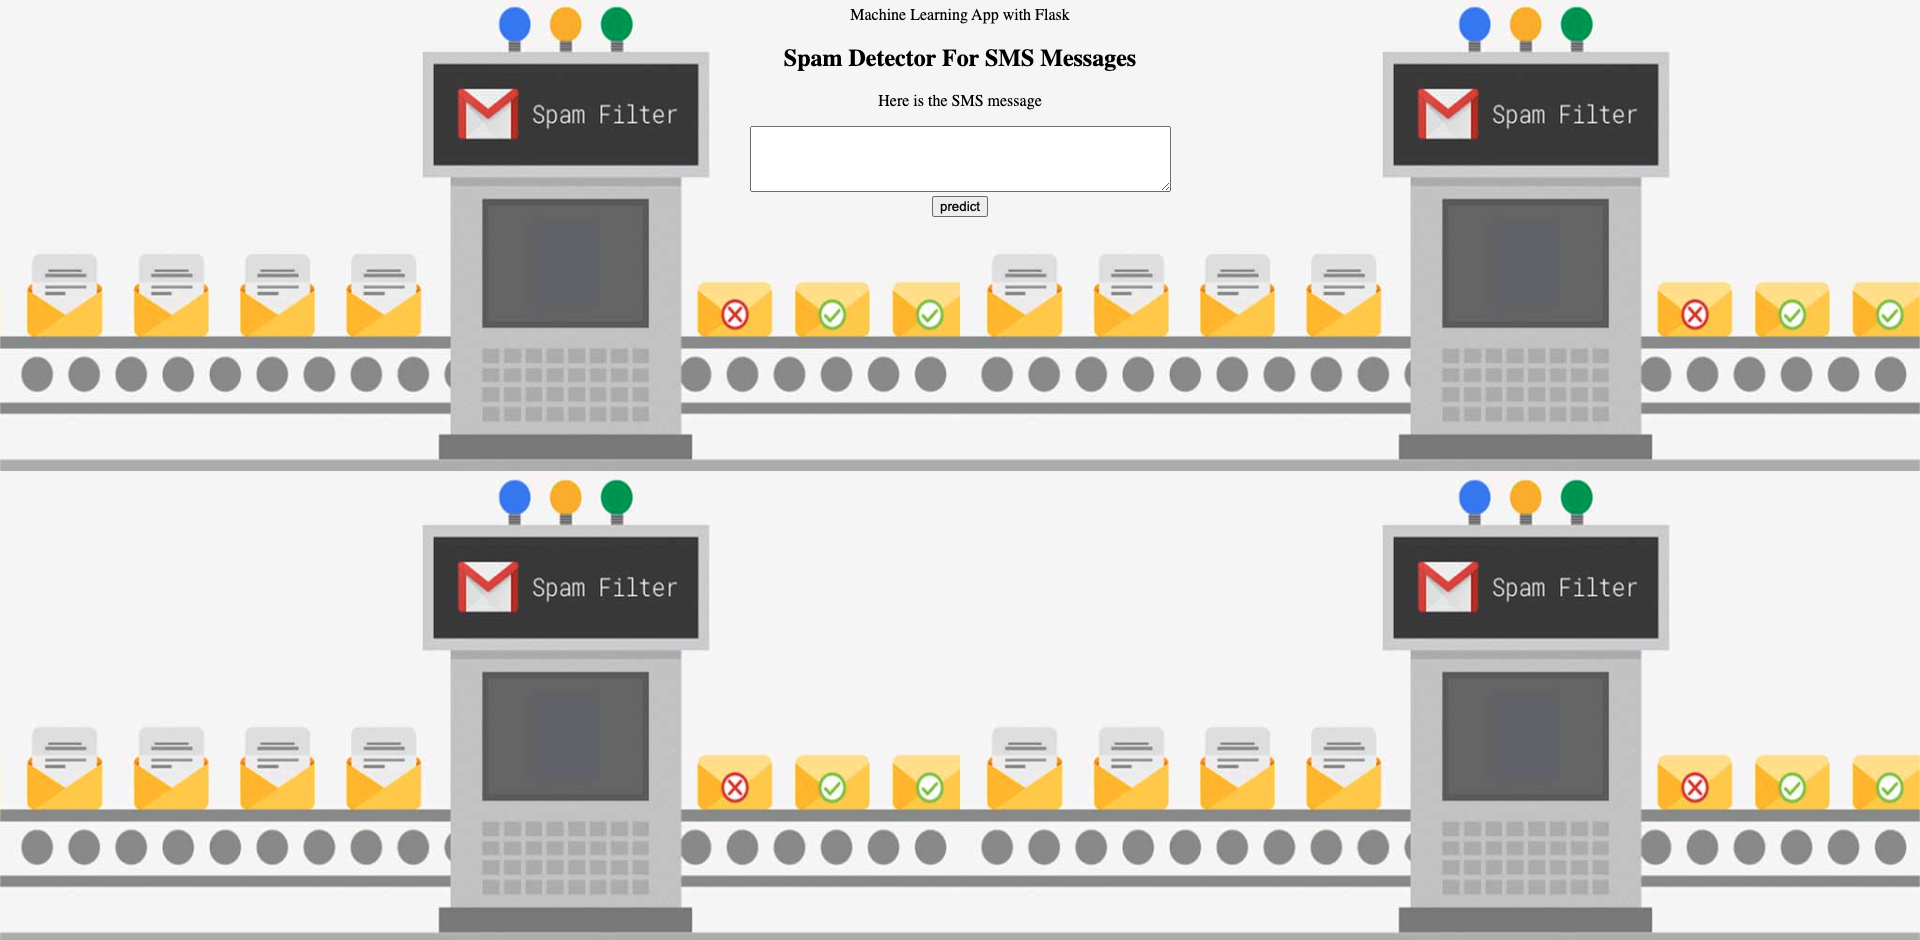

* User can simply type in words, phrases, and sentences in the dialog box as if this is an SMS message
* After inputting text in the dialog box, click "Predict"
* The response from the algorithm will tell you whether the message is "Ham"(non-spam) or "Spam"